# DW_oa_Task03
## python自动化之word
## 20210618

# python自动化之word操作

## 一、课前准备

> python 处理 Word 需要用到 python-docx 库，终端执行如下安装命令： 

In [1]:
!pip install python-docx

> 或在pycharm的setting操作安装（示意如下）：

 ![](.\图片\安装docx.png)

## 二、知识要点

> 说明：
> 1. 通过小试牛刀初步认识docx，然后系统学习python对word的操作；
> 2. 预估每个知识点需要讲解的时间；
> 3. 研发逻辑就是讲解逻辑，一般从上往下，遵循：`What - Why - How` 或 `Why - What - How` 思路；

### 1.预热：初步认识docx

 相信同学们都进行过word的操作。话不多说，直接上python对word简单操作的代码，先有个直观的感觉，然后再系统学习！

#### （1）新建空白word并插入文字 

In [2]:
# 导入库
from docx import Document

In [3]:
# 新建空白文档
doc_1 = Document()

In [4]:
# 添加标题（0相当于文章的题目，默认级别是1，级别范围为0-9）
doc_1.add_heading('新建空白文档标题，级别为0',level = 0)
doc_1.add_heading('新建空白文档标题，级别为1',level = 1)
doc_1.add_heading('新建空白文档标题，级别为2',level = 2)

In [5]:
# 新增段落
paragraph_1 = doc_1.add_paragraph('这是第一段文字的开始\n请多多关照！')

In [6]:
# 加粗
paragraph_1.add_run('加粗字体').bold = True
paragraph_1.add_run('普通字体')

In [7]:
# 斜体
paragraph_1.add_run('斜体字体').italic =True

In [8]:
# 新段落（当前段落的下方）
paragraph_2 = doc_1.add_paragraph('新起的第二段文字。')

In [9]:
# 新段落（指定端的上方）
prior_paragraph = paragraph_1.insert_paragraph_before('在第一段文字前插入的段落')

In [10]:
# 添加分页符(可以进行灵活的排版）
doc_1.add_page_break()

In [11]:
# 新段落（指定端的上方）
paragraph_3 = doc_1.add_paragraph('这是第二页第一段文字！')

In [12]:
# 保存文件（当前目录下）
doc_1.save('doc_1.docx')

基本的文档构建原理明白了，总觉得少了点什么，哦，对了，是所见即所得，在写的过程中，大概在思维中形成一个框架，但具体的内容还是直接显示更直观，特别是当内容多了以后，以及排版效果等等，总是需要一个实际的展示。

### 2. 正式：python自动化之word操作

上节只是小试牛刀一下，接下来我们系统地学习python自动化之word操作。

在操作之前，我们需要了解 Word 文档的<font color=red>页面结构</font> ：

- 文档 - Document
- 段落 - Paragraph
- 文字块 - Run

**`python-docx`**将整个文章看做是一个**`Document`**对象 ，其基本结构如下：

- 每个**`Document`**包含许多个代表“段落”的**`Paragraph`**对象，存放在**`document.paragraphs`**中。
- 每个**`Paragraph`**都有许多个代表"行内元素"的**`Run`**对象，存放在**`paragraph.runs`**中。

在**`python-docx`**中，**`run`**是最基本的单位，每个**`run`**对象内的文本样式都是一致的，也就是说，在从**`docx`**文件生成文档对象时，**`python-docx`**会根据样式的变化来将文本切分为一个个的`Run`对象。

#### （1）整体页面结构介绍

我们以一个小案例为主线把文档，段落和文字块串一下：

In [13]:
# 导入库
from docx import Document
from docx.shared import RGBColor, Pt,Inches,Cm
from docx.enum.text import WD_PARAGRAPH_ALIGNMENT
from docx.oxml.ns import qn

In [14]:
# 新建文档（Datawhale）
doc_1 = Document()

In [15]:
# 字体设置（全局）
'''只更改font.name是不够的，还需要调用._element.rPr.rFonts的set()方法。'''

doc_1.styles['Normal'].font.name = u'宋体'
doc_1.styles['Normal']._element.rPr.rFonts.set(qn('w:eastAsia'), u'宋体')

In [16]:
# 添加标题（0相当于文章的题目，默认级别是1，级别范围为0-9，0时候自动带下划线）
heading_1 = doc_1.add_heading('周杰伦',level = 0)
heading_1.alignment = WD_PARAGRAPH_ALIGNMENT.CENTER   #居中对齐，默认居左对齐

In [17]:
# 新增段落
paragraph_1 = doc_1.add_paragraph()
'''
设置段落格式：首行缩进0.75cm，居左，段后距离1.0英寸,1.5倍行距。
'''
paragraph_1.paragraph_format.first_line_indent = Cm(0.75)
paragraph_1.paragraph_format.alignment =  WD_PARAGRAPH_ALIGNMENT.LEFT
paragraph_1.paragraph_format.space_after =  Inches(1.0)
paragraph_1.paragraph_format.line_spacing =  1.5

text = '中国台湾华语流行歌手、' \
       '音乐创作家、作曲家、作词人、' \
       '制作人、杰威尔音乐公司老板之一、导演。' \
       '近年涉足电影行业。周杰伦是2000年后亚洲流行乐坛最具革命性与指标' \
       '性的创作歌手，有“亚洲流行天王”之称。他突破原有亚洲音乐的主题、形' \
       '式，融合多元的音乐素材，创造出多变的歌曲风格，尤以融合中西式曲风的嘻哈' \
       '或节奏蓝调最为著名，可说是开创华语流行音乐“中国风”的先声。周杰伦的' \
       '出现打破了亚洲流行乐坛长年停滞不前的局面，为亚洲流行乐坛翻开了新的一页！'
    
r_1 = paragraph_1.add_run(text)
r_1.font.size =Pt(10)    #字号
r_1.font.bold =True       #加粗
r_1.font.color.rgb =RGBColor(255,0,0)      #颜色

In [18]:
# 加个段落试试
paragraph_2 = doc_1.add_paragraph()
paragraph_2.paragraph_format.first_line_indent = Cm(0)
paragraph_2.paragraph_format.alignment = WD_PARAGRAPH_ALIGNMENT.CENTER
paragraph_2.paragraph_format.space_before = Inches(2.0)   # 测试前面已设置段后距离1.0,我再设置段前距离2.0,看看什么结果
paragraph_2.paragraph_format.line_spacing = 2.0

text1 = '一路向北、七里香、不能说的秘密、\n'\
        '东风破、以父之名、双截棍、可爱女人、夜曲、大灌篮、\n'\
        '天台爱情、头文字D、床边故事、晴天、满城尽带黄金甲、\n'\
        '爱在西元前、稻香、简单爱、轨迹、青花瓷、龙卷风\n'

r_2 = paragraph_2.add_run(text1)
r_2.font.size = Pt(12)
r_2.font.italic = True
r_2.font.color.rgb =RGBColor(123,0,200)

In [19]:
# 保存文件（当前目录下）
doc_1.save('周杰伦.docx')

通过上例我们可以看到，最小的操作对象为文字块，通过run的指定进行操作。比如字号，颜色等；而再上一个层级--段落是的格式是通过paragraph_format进行设置；

加了个段落，作了些基本的测试，设置参数比较多，怕记不住，操作起来倒是挺直观的，来看看结果.

In [20]:
doc_2 = Document('周杰伦.docx')
for p in doc_2.paragraphs:
    print(p.text)

周杰伦
中国台湾华语流行歌手、音乐创作家、作曲家、作词人、制作人、杰威尔音乐公司老板之一、导演。近年涉足电影行业。周杰伦是2000年后亚洲流行乐坛最具革命性与指标性的创作歌手，有“亚洲流行天王”之称。他突破原有亚洲音乐的主题、形式，融合多元的音乐素材，创造出多变的歌曲风格，尤以融合中西式曲风的嘻哈或节奏蓝调最为著名，可说是开创华语流行音乐“中国风”的先声。周杰伦的出现打破了亚洲流行乐坛长年停滞不前的局面，为亚洲流行乐坛翻开了新的一页！
一路向北、七里香、不能说的秘密、
东风破、以父之名、双截棍、可爱女人、夜曲、大灌篮、
天台爱情、头文字D、床边故事、晴天、满城尽带黄金甲、
爱在西元前、稻香、简单爱、轨迹、青花瓷、龙卷风



只能按段落读取文档的内容，这样也无法实际所见即所得，再往下看

#### （2）字体设置

通过（1），同学们已经注意到，字体的设置是全局变量。如果我想在不同的部分进行不同字体的设置，那该怎么办呢？这就需要在应用前操作设置一下。

In [21]:
'''字体设置1.py'''
#导入库
from docx import Document
from docx.oxml.ns import qn
from docx.enum.style import WD_STYLE_TYPE

document = Document() # 新建docx文档

In [22]:
# 设置宋体字样式
style_font = document.styles.add_style('宋体', WD_STYLE_TYPE.CHARACTER)
style_font.font.name = '宋体'
document.styles['宋体']._element.rPr.rFonts.set(qn('w:eastAsia'), u'宋体')

In [23]:
# 设置楷体字样式
style_font = document.styles.add_style('楷体', WD_STYLE_TYPE.CHARACTER)
style_font.font.name = '楷体'
document.styles['楷体']._element.rPr.rFonts.set(qn('w:eastAsia'), u'楷体') # 将段落中的所有字体

In [24]:
# 设置华文中宋字样式
style_font = document.styles.add_style('华文中宋', WD_STYLE_TYPE.CHARACTER)
style_font.font.name = '华文中宋'
document.styles['华文中宋']._element.rPr.rFonts.set(qn('w:eastAsia'), u'华文中宋')

In [25]:
paragraph1 = document.add_paragraph() # 添加段落
run = paragraph1.add_run(u'aBCDefg这是中文', style='宋体') # 设置宋体样式

In [26]:
font = run.font #设置字体
font.name = 'Cambira' # 设置西文字体
paragraph1.add_run(u'aBCDefg这是中文', style='楷体').font.name = 'Cambira'
paragraph1.add_run(u'aBCDefg这是中文', style='华文中宋').font.name = 'Cambira'

In [27]:
document.save('字体设置1.docx')

In [28]:
'''字体设置2.py'''
#导入库
from docx import Document
from docx.oxml.ns import qn
from docx.enum.style import WD_STYLE_TYPE

In [29]:
#定义字体设置函数
def font_setting(doc,text,font_cn):
       style_add = doc.styles.add_style(font_cn, WD_STYLE_TYPE.CHARACTER)
       style_add.font.name = font_cn
       doc.styles[font_cn]._element.rPr.rFonts.set(qn('w:eastAsia'), font_cn)
       par = doc.add_paragraph()
       text = par.add_run(text, style=font_cn)

In [30]:
doc = Document()
a = '小朋友 你是否有很多问号'
b = '为什么 别人在那看漫画'
c = '我却在学画画 对着钢琴说话'

In [31]:
font_setting(doc,a,'宋体')
font_setting(doc,b,'华文中宋')
font_setting(doc,c,'黑体')

In [32]:
doc.save('字体设置2.docx')

我们很容易地看出来，字体设置1.py与字体设置2.py的区别在于是否为同一段落，同时字体设置2.py中自定义了一个函数。同学们可以在实际工作中看具体场景进行选择。


两种方式各有优点，看实际情况运用，就是感觉命令参数太多了，,记不住啊

#### （3） 插入图片与表格

In [33]:
#导入库
from docx import Document
from docx.shared import Inches

In [34]:
#打开文档
doc_1 = Document('周杰伦.docx')   #上面脚本存储的文档

In [35]:
#新增图片
doc_1.add_picture('./图片/周杰伦.jpg',width=Inches(2.0), height=Inches(2.0))

In [36]:
# 创建3行1列表格
table1 = doc_1.add_table(rows=3, cols=4)
table1.style='Medium Grid 1 Accent 1'  #表格样式很多种，如，Light Shading Accent 1等

In [37]:
# 修改第2行第3列单元格的内容为营口
table1.cell(1, 2).text = '营口'   # 行列还是从0开头，下面的方式也是一样
# 修改第3行第4列单元格的内容为人民
table1.rows[2].cells[3].text = '人民'

In [38]:
# 在表格底部新增一行
row_cells = table1.add_row().cells
# 新增行的第一列添加内容
row_cells[0].text = '加油'

In [39]:
doc_1.save('周杰伦为营口加油.docx')

这里发现一个问题，这个结果已经写到第二页了，按照这种方式编辑，你都不知道写到那里，更无从谈及整体的格式如何，没有所见即所得，真的不好把控，可能这个比较适合一些格式化的公文之类，长篇的内容就不大适用了

#### （4）设置页眉页脚

在python-docx包中则要使用节(section)中的页眉(header)和页脚(footer)对象来具体设置。

In [40]:
from docx import Document
from docx.enum.text import WD_PARAGRAPH_ALIGNMENT

In [41]:
document = Document() # 新建文档

In [42]:
header = document.sections[0].header # 获取第一个节的页眉
print('页眉中默认段落数：', len(header.paragraphs))
paragraph = header.paragraphs[0] # 获取页眉的第一个段落
paragraph.add_run('这是第一节的页眉') # 添加页面内容
footer = document.sections[0].footer # 获取第一个节的页脚
paragraph = footer.paragraphs[0] # 获取页脚的第一个段落
paragraph.add_run('这是第一节的页脚') # 添加页脚内容

页眉中默认段落数： 1


在docx文档中又添加了2个节，共计3个节，页面和页脚会显示了“与上一节相同”。  
如果不使用上一节的内容和样式要将header.is_linked_to_previous的属性或footer.is_linked_to_previous的属性设置为False，  
用于解除“链接上一节页眉”或者“链接上一节页脚”。

In [43]:
document.add_section() # 添加一个新的节
document.add_section() # 添加第3个节
header = document.sections[1].header # 获取第2个节的页眉
header.is_linked_to_previous = False # 不使用上节内容和样式

In [44]:
#对齐设置
header = document.sections[1].header # 获取第2个节的页眉
header.is_linked_to_previous = False # 不使用上节内容和样式
paragraph = header.paragraphs[0]
paragraph.add_run('这是第二节的页眉')
paragraph.alignment = WD_PARAGRAPH_ALIGNMENT.CENTER # 设置页眉居中对齐
document.sections[1].footer.is_linked_to_previous = False
footer.paragraphs[0].add_run('这是第二节的页脚') # 添加第2节页脚内容
footer.paragraphs[0].alignment = WD_PARAGRAPH_ALIGNMENT.CENTER # 设置第2节页脚居中对齐
header = document.sections[2].header # 获取第3个节的页眉
header.is_linked_to_previous = False # 不使用上节的内容和样式
paragraph = header.paragraphs[0] # 获取页眉中的段落
paragraph.add_run('这是第三节的页眉')
paragraph.alignment = WD_PARAGRAPH_ALIGNMENT.RIGHT # 设置页眉右对齐
document.sections[2].footer.is_linked_to_previous = False
footer.paragraphs[0].add_run('这是第三节的页脚') # 添加第3节页脚内容
footer.paragraphs[0].alignment = WD_PARAGRAPH_ALIGNMENT.RIGHT # 设置第3节页脚右对齐

In [45]:
document.save('页眉页脚1.docx') # 保存文档

结果如下：

 ![](.\图片\页眉页脚设置.png)

这东西好像是为了长篇大论准备的，看来还是不够了解，继续学习

#### （5）代码延伸

In [46]:
'''对齐设置'''
from docx.enum.text import WD_ALIGN_PARAGRAPH,WD_LINE_SPACING
#LEFT: 左对齐
#CENTER: 文字居中
#RIGHT: 右对齐
#JUSTIFY: 文本两端对齐

In [47]:
'''设置段落行距'''
from docx.shared import Length
# SINGLE :单倍行距（默认）
#ONE_POINT_FIVE : 1.5倍行距
# DOUBLE2 : 倍行距
#AT_LEAST : 最小值
#EXACTLY:固定值
# MULTIPLE : 多倍行距

In [48]:
paragraph_format = paragraph.paragraph_format
paragraph.line_spacing_rule = WD_LINE_SPACING.EXACTLY #固定值
paragraph_format.line_spacing = Pt(18) # 固定值18磅
paragraph.line_spacing_rule = WD_LINE_SPACING.MULTIPLE #多倍行距
paragraph_format.line_spacing = 1.75 # 1.75倍行间距

In [49]:
'''设置字体属性'''
from docx.shared import RGBColor,Pt
#all_caps:全部大写字母
#bold:加粗
#color:字体颜色

#double_strike:双删除线
#hidden : 隐藏
#imprint : 印记
#italic : 斜体
#name  :字体
#shadow  :阴影
#strike  :  删除线
#subscript  :下标	
#superscript  :上标
#underline  :下划线

很多参数，在百度再找了一些内容，要熟练运用恐怕得很长时间

In [50]:
# 这是项目符号列表
from docx import Document
doc = Document()
p = doc.add_paragraph()
p.style = 'List Bullet'
r = p.add_run()
r.add_text("Item 1")
# Something's gotta come here to get the Sub-Item 1
r = p.add_run()
r.add_text("Item 2")    
# Something's gotta come here to get the Sub-Item 2
# 以上方式不能实现,应该参照下面方式按段落来设置
doc.add_paragraph('first item in unordered list', style='List Bullet')
doc.add_paragraph('first item in ordered list', style='List Number')

doc.save('项目列表.docx')

## 三、项目实践

### 一、需求

>  你是公司的行政人员，对合作伙伴进行邀请，参加公司的会议；
>
>  参会人名单如下：

 ![](.\图片\参会人名单.png)

拟定的邀请函样式如下：

 ![](.\图片\邀请函样式.png)

**根据参会人名单，利用python批量生成邀请函。**

### 二、需求分析

> 逻辑相对简单：
>
> - 获取 Excel 文件中每一行的信息，提取 参数；结合获取的参数设计邀请函样式并输出
> - 设计word段落及字体等样式。

### 三、代码

以下是个人思路及代码

先设计邀请函，而后再根据Excel信息写入

In [51]:
def yqh(gs,xm,sj):
    doc_yqh = Document()
    doc_yqh.styles['Normal'].font.name = u'楷体'
    doc_yqh.styles['Normal']._element.rPr.rFonts.set(qn('w:eastAsia'), u'楷体')
    heading_1 = doc_yqh.add_heading('邀 请 函', level=1)
    heading_1.alignment = WD_PARAGRAPH_ALIGNMENT.CENTER
    paragraph_1 = doc_yqh.add_paragraph('尊敬的')
    r_1 = paragraph_1.add_run(gs)
    r_1.font.bold = True
    r_1.font.underline = True
    paragraph_1.add_run('公司')
    r_2 = paragraph_1.add_run(xm)
    r_2.font.bold = True
    r_2.font.underline = True
    paragraph_1.add_run('，您好：')
    paragraph_2 = doc_yqh.add_paragraph()
    paragraph_2.paragraph_format.first_line_indent = Cm(0.75)
    paragraph_2.paragraph_format.alignment = WD_PARAGRAPH_ALIGNMENT.LEFT
    paragraph_2.paragraph_format.line_spacing = 1.5
    text = '现诚挚的邀请您于2021年10月27日参加DataWhale主办的享受开源2050活动，地点在北京鸟巢，希望您届时莅临参加。'
    paragraph_2.add_run(text)
    #r_1.font.size = Pt(10)
    paragraph_3 = doc_yqh.add_paragraph('邀请时间：')
    sjlist = sj.split('-')
    sj = '{}年{}月{}日'.format(sjlist[0],sjlist[1],sjlist[2])
    r_3 = paragraph_3.add_run(sj)
    r_3.font.bold = True
    r_3.font.underline = True
    paragraph_3.paragraph_format.space_before = Inches(1.0)
    paragraph_3.paragraph_format.alignment = WD_PARAGRAPH_ALIGNMENT.RIGHT
    doc_yqh.save('{}{}_{}.docx'.format(gs,xm,sj))

gs = '成功'
xm = '非常大大'
sj = '2021-01-01'
yqh(gs,xm,sj)

邀请函模版完成  
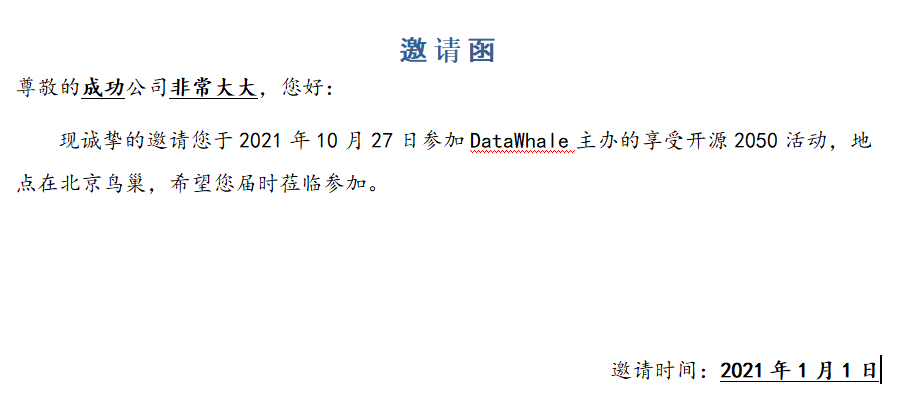

上面做出的模版没有考虑到邀请时间的格式问题，当时取值sj='2021年1月1日'，所以格式就是上图的样子，做到下面的时候发现这个问题，重新做了修改  
接下来读取Excel文档，继续项目

In [52]:
from openpyxl import load_workbook
workbook = load_workbook('.\\图片\\excel到word.xlsx')
sheet = workbook.active
for cells in sheet.iter_rows(min_row =2):
    gs = cells[0].value
    zw = cells[1].value
    mz = cells[2].value
    sj = cells[3].value
    print('{}{}{}{}'.format(gs,zw,mz,str(sj)[:10]))
    yqh(gs,zw+mz,str(sj)[:10])

阿里数据工程师牛云2021-02-15
腾讯数据分析师牛化腾2021-02-16
百度数据架构师张艳红2021-02-17
京东算法工程师王强东2021-02-18


最终生成的结果文件  
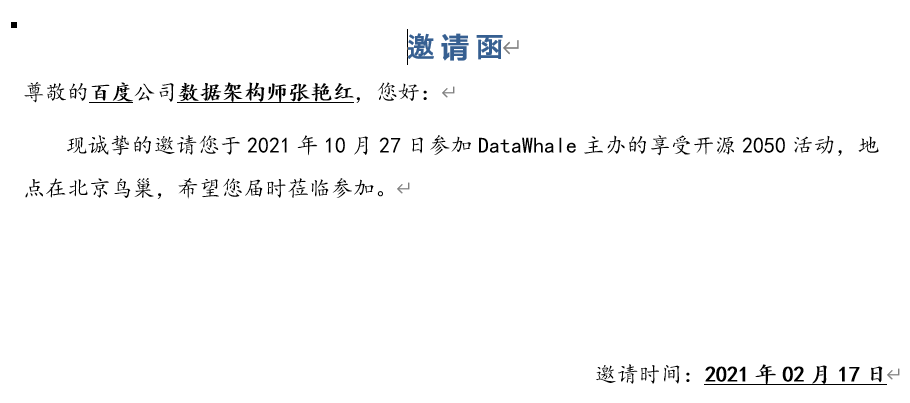

整个项目做一遍之后能加深印象，相比看而言，实操才是最有效果的，邀请函标题的格式字体没改过来，试了几个命令还是达不到效果，抽时间再研究研究

下面是教程示例代码

In [53]:
# 导入库
from openpyxl import load_workbook
from docx import Document
from docx.enum.text import WD_PARAGRAPH_ALIGNMENT
from docx.shared import RGBColor, Pt,Inches,Cm
from docx.oxml.ns import qn


path = r'D:\\pythontest\\DW_oa\\图片'
# 路径为Excel 文件所在的位置，可按实际情况更改

workbook = load_workbook(path + r'\excel到word.xlsx')
sheet = workbook.active   #默认的WorkSheet

n = 0   #为了不遍历标题（excel的第一行）
for row in sheet.rows:
    if n:
        company = row[0].value
        office = row[1].value
        name = row[2].value
        date = str(row[3].value).split()[0]
        print(company, office, name, date)


        doc = Document()
        heading_1 = '邀 请 函'
        paragraph_1 = doc.add_heading(heading_1, level=1)
        # 居中对齐
        paragraph_1.alignment = WD_PARAGRAPH_ALIGNMENT.CENTER
        # 单独修改较大字号
        for run in paragraph_1.runs:
            run.font.size = Pt(17)

        greeting_word_1 = '尊敬的'
        greeting_word_2 = '公司'
        greeting_word_3 = '，您好：'
        paragraph_2 = doc.add_paragraph()

        paragraph_2.add_run(greeting_word_1)
        r_1 = paragraph_2.add_run(company)
        r_1.font.bold = True  # 加粗
        r_1.font.underline = True    #下划线

        paragraph_2.add_run(greeting_word_2)

        r_2 = paragraph_2.add_run(office)
        r_2.font.bold = True  # 加粗
        r_2.font.underline = True    #下划线

        r_3 = paragraph_2.add_run(name)
        r_3.font.bold = True  # 加粗
        r_3.font.underline = True    #下划线
        paragraph_2.add_run(greeting_word_3)

        paragraph_3 = doc.add_paragraph()
        paragraph_3.add_run('现诚挚的邀请您于2021年10月27日参加DataWhale主办的享受开源2050活动，地点在北京鸟巢，希望您届时莅临参加。')
        paragraph_3.paragraph_format.first_line_indent = Cm(0.75)
        paragraph_3.paragraph_format.alignment = WD_PARAGRAPH_ALIGNMENT.LEFT
        paragraph_3.paragraph_format.space_after = Inches(1.0)
        paragraph_3.paragraph_format.line_spacing = 1.5

        paragraph_4 = doc.add_paragraph()
        date_word_1 = '邀请时间：'
        paragraph_4.add_run(date_word_1)
        paragraph_4.alignment = WD_PARAGRAPH_ALIGNMENT.RIGHT
        sign_date = "{}年{}月{}日".format(date.split('-')[0], date.split('-')[1], date.split('-')[2])
        paragraph_4.add_run(sign_date).underline = True
        paragraph_4.alignment = WD_PARAGRAPH_ALIGNMENT.RIGHT
        
        #设置全文字体
        for paragraph in doc.paragraphs:
            for run in paragraph.runs:
                run.font.color.rgb = RGBColor(0, 0, 0)
                run.font.name = '楷体'
                r = run._element.rPr.rFonts
                r.set(qn('w:eastAsia'), '楷体')
        doc.save(path + "\{}-邀请函.docx".format(name))
    n = n + 1

阿里 数据工程师 牛云 2021-02-15
腾讯 数据分析师 牛化腾 2021-02-16
百度 数据架构师 张艳红 2021-02-17
京东 算法工程师 王强东 2021-02-18


### 四、总结

> 本案例也可适用于批量生产固定格式的word，如工资条，通知单等

#### 题后话

学了这一节有些感受，是否WORD的这种操作过于复杂，有没有更简单一些的方法来处理，命令参数好长，真的记不住